In [231]:
import numpy as np
import pandas as pd
import random
from scipy import stats
from statsmodels.stats.weightstats import ztest
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import scipy
import statistics


%matplotlib inline
sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')
warnings.filterwarnings('ignore')

In [232]:
df = pd.read_csv('Inc_Exp_Data.csv')
df.sample(10)

# Thu nhập hàng tháng
# Chi phí hằng tháng
# Số thành viên
# Tiền thuê hằng tháng
# Thu nhập hằng năm
# Trình độ học vấn cao nhất
# Số người kiếm tiền

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
47,100000,30000,6,0,1404000,Graduate,3
6,15000,16000,3,35000,167400,Post-Graduate,1
14,24000,10000,4,0,244800,Graduate,2
19,30000,13000,4,0,385200,Graduate,1
0,5000,8000,3,2000,64200,Under-Graduate,1
27,40000,10000,4,0,412800,Under-Graduate,1
30,45000,25000,6,0,523800,Graduate,3
2,10000,4500,2,0,112800,Under-Graduate,1
39,60000,10000,3,0,590400,Post-Graduate,1
8,19000,9000,2,0,218880,Under-Graduate,1


In [233]:
# Xem thông tin dữ liệu đưa vào
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


# The Distribution

In [234]:
def result(p):
    df2 = pd.DataFrame(p, index=[''])
    return df2[p]

In [235]:
# Bảng trung bình thu nhập hàng tháng, chi phí hàng tháng, thu nhập hàng năm
a = {}
a['Class'] = 'Value'
for i in ['Mthly_HH_Income','Mthly_HH_Expense','Annual_HH_Income']:
    a[i+'_mean'] = df[i].mean()

result(a)

,Class,Mthly_HH_Income_mean,Mthly_HH_Expense_mean,Annual_HH_Income_mean
,Value,41558.0,18818.0,490019.04


In [262]:
GDP = (df['Mthly_HH_Income'] - df['Mthly_HH_Expense'] - df['Emi_or_Rent_Amt'])/df['No_of_Fly_Members']

In [263]:
Type = []
for i in money:
    if i <= 1500 : Type.append('Poor')
    elif i <= 7000 : Type.append('Normal')
    else : Type.append('Rich')
df.insert(7,"GDP",GDP)
df.insert(8,"Type",Type)

ValueError: cannot insert GDP, already exists

In [238]:
df

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,GDP,Type
0,5000,8000,3,2000,64200,Under-Graduate,1,-1666.666667,Poor
1,6000,7000,2,3000,79920,Illiterate,1,-2000.000000,Poor
2,10000,4500,2,0,112800,Under-Graduate,1,2750.000000,Normal
3,10000,2000,1,0,97200,Illiterate,1,8000.000000,Rich
4,12500,12000,2,3000,147000,Graduate,1,-1250.000000,Poor
5,14000,8000,2,0,196560,Graduate,1,3000.000000,Normal
6,15000,16000,3,35000,167400,Post-Graduate,1,-12000.000000,Poor
7,18000,20000,5,8000,216000,Graduate,1,-2000.000000,Poor
8,19000,9000,2,0,218880,Under-Graduate,1,5000.000000,Normal
9,20000,9000,4,0,220800,Under-Graduate,2,2750.000000,Normal


In [239]:
x = df.groupby('Type')['Type'].count()
x = pd.DataFrame(x)
x.columns = ['Percent']
type_inc = x/sum(x['Percent'])*100
type_inc

,Percent
Type,
Normal,40.0
Poor,24.0
Rich,36.0


Text(0, 0.5, 'Percent')

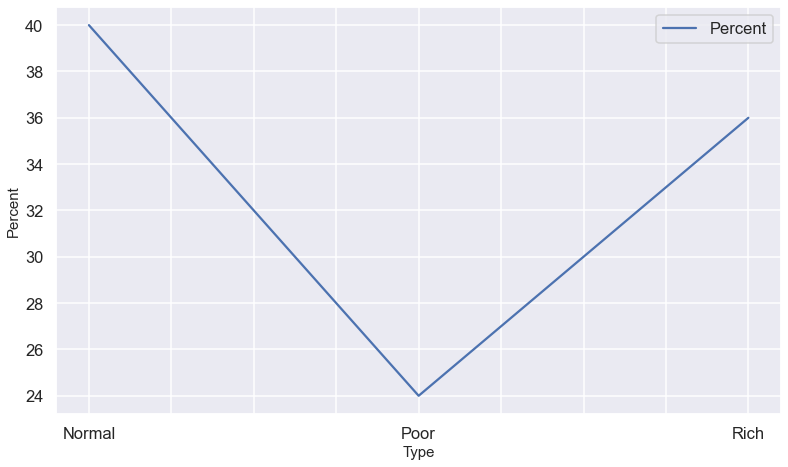

In [240]:
type_inc.plot()
plt.xlabel('Type', fontsize=15)
plt.ylabel('Percent', fontsize=15)

In [241]:
# Bảng thống kê phần trăm tiền thuê hàng tháng

x = pd.DataFrame(df.groupby('Emi_or_Rent_Amt')['Emi_or_Rent_Amt'].count())
x.columns = ['Percent']
x.index.names = ['Count']
amt = x/sum(x['Percent'])*100
amt

,Percent
Count,
0,60.0
1000,2.0
2000,4.0
2500,2.0
3000,4.0
3500,6.0
4000,2.0
5000,4.0
8000,4.0


Text(0, 0.5, 'Percent')

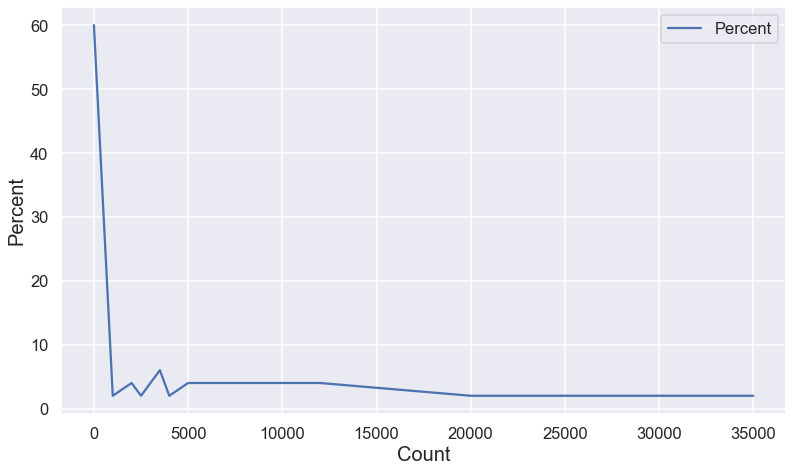

In [242]:
amt.plot()
plt.xlabel('Count', fontsize=20)
plt.ylabel('Percent', fontsize=20)

In [243]:
# Bảng thống kê phần trăm về học vấn

x = pd.DataFrame(df.groupby('Highest_Qualified_Member')['Highest_Qualified_Member'].count())
x.columns = ['Percent']
x.index.names = ['Count']
qualified = x/sum(x['Percent'])*100
qualified

,Percent
Count,
Graduate,38.0
Illiterate,10.0
Post-Graduate,12.0
Professional,20.0
Under-Graduate,20.0


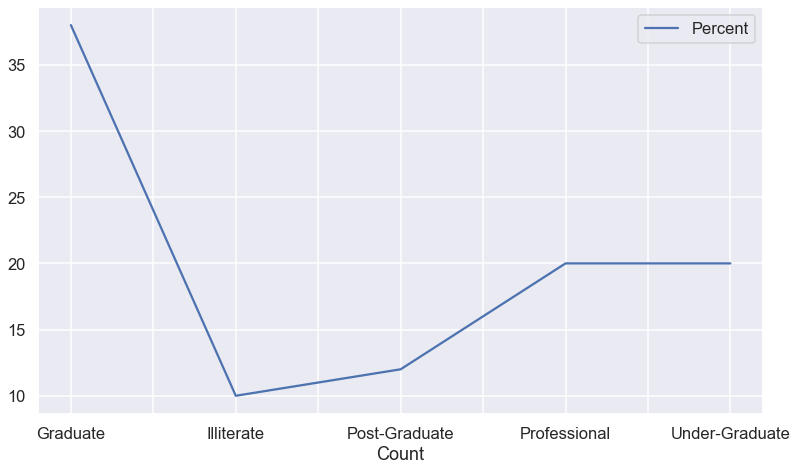

In [244]:
qualified.plot()

# The Central Tendency

In [245]:
df.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members,GDP
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000,5279.261905
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291,6557.838681
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000,-12000.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000,1812.500000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000,4250.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000,7750.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000,30500.000000


In [246]:
# Giá trị yếu vị

print('Mode value of dataset:')
df.mode()

Mode value of dataset:


,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,GDP,Type
0,45000.0,25000.0,4.0,0.0,590400.0,Graduate,1.0,2500.0,Normal
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7500.0,NaN


In [247]:
# Giá trị phương sai

print('Varian value of dataset:')
pd.DataFrame(df.var())

Varian value of dataset:


,0
Mthly_HH_Income,6.811009e+08
Mthly_HH_Expense,1.461733e+08
No_of_Fly_Members,2.302449e+00
Emi_or_Rent_Amt,3.895551e+07
Annual_HH_Income,1.024869e+11
No_of_Earning_Members,5.391837e-01
GDP,4.300525e+07


In [248]:
print('Table of values showing dependencies :')
data_mx = df.corr(method = "pearson")
data_mx

Table of values showing dependencies :


,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members,GDP
Mthly_HH_Income,1.000000,0.649215,0.448317,0.036976,0.970315,0.347883,0.579835
Mthly_HH_Expense,0.649215,1.000000,0.639702,0.405280,0.591222,0.311915,-0.114770
No_of_Fly_Members,0.448317,0.639702,1.000000,0.085808,0.430868,0.597482,-0.179845
Emi_or_Rent_Amt,0.036976,0.405280,0.085808,1.000000,0.002716,-0.097431,-0.472292
Annual_HH_Income,0.970315,0.591222,0.430868,0.002716,1.000000,0.296679,0.556056
No_of_Earning_Members,0.347883,0.311915,0.597482,-0.097431,0.296679,1.000000,0.012607
GDP,0.579835,-0.114770,-0.179845,-0.472292,0.556056,0.012607,1.000000


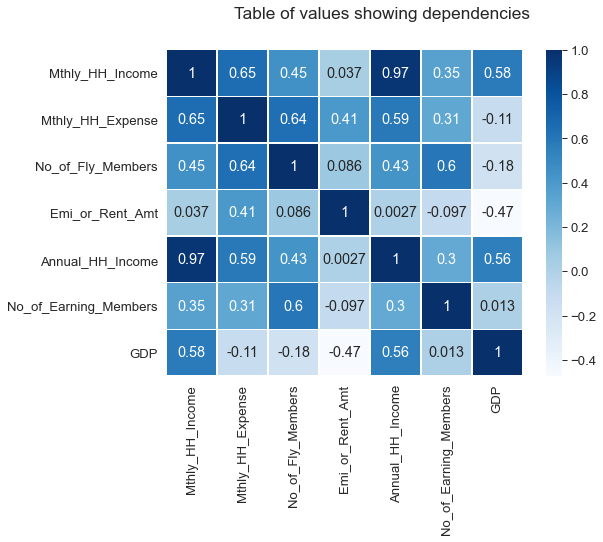

In [249]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.5)
plt.suptitle('Table of values showing dependencies')
sns.heatmap(data_mx, annot=True, cmap='Blues', linewidths=0.5, linecolor='white')

# Data Visualization

In [250]:
data = df['Mthly_HH_Income']
data = np.log1p(data)
data.sample(10)

28    10.645449
48    11.512935
25    10.463132
9      9.903538
47    11.512935
33    10.714440
36    10.819798
43    11.289794
1      8.699681
19    10.308986
Name: Mthly_HH_Income, dtype: float64

In [251]:
# Chuẩn hóa
def chuan_hoa(data):
    return (data -  np.mean(data))/np.std(data)

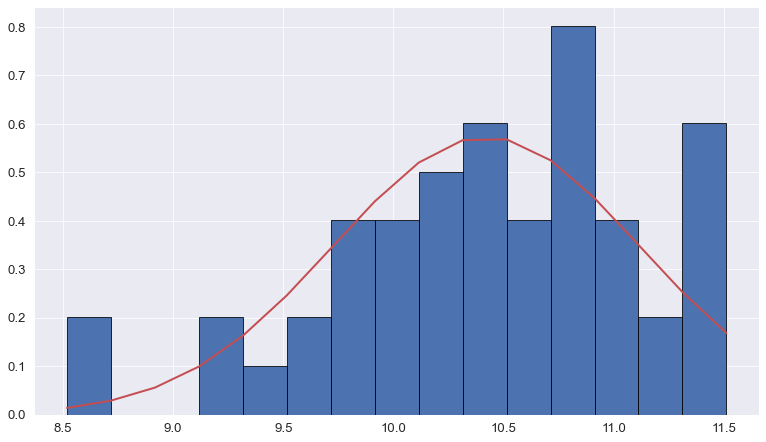

In [252]:
# kiểm tra phân phối chuẩn
std = np.std(data)
count, bins, ignored = plt.hist(data, 15, edgecolor='black', density=True)
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (bins - np.mean(data))**2 / (2 * std**2) ),linewidth=2, color='r')

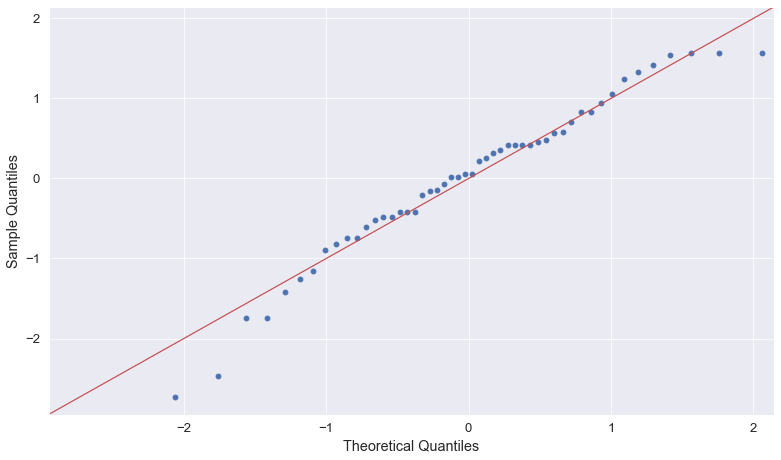

In [253]:
import statsmodels.api as sm
sm.qqplot(chuan_hoa(data), line ='45').show()

{'whiskers': [<matplotlib.lines.Line2D at 0x20614997400>,
 'caps': [<matplotlib.lines.Line2D at 0x206149be0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20614997b20>],
 'medians': [<matplotlib.lines.Line2D at 0x206149be790>],
 'fliers': [<matplotlib.lines.Line2D at 0x206149bea90>],
 'means': []}

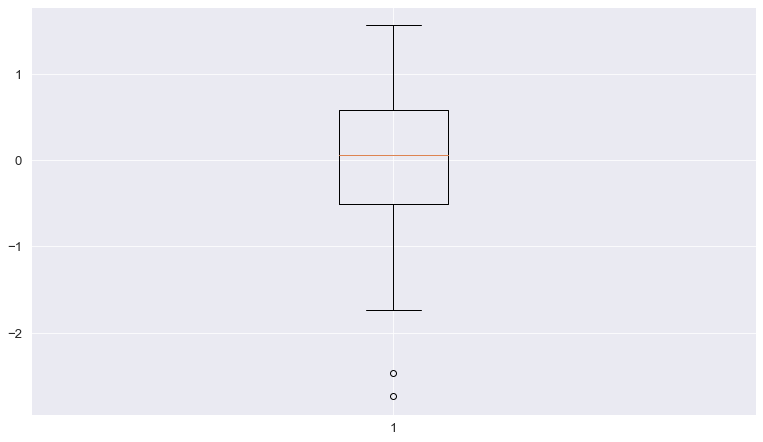

In [254]:
plt.boxplot(chuan_hoa(data))

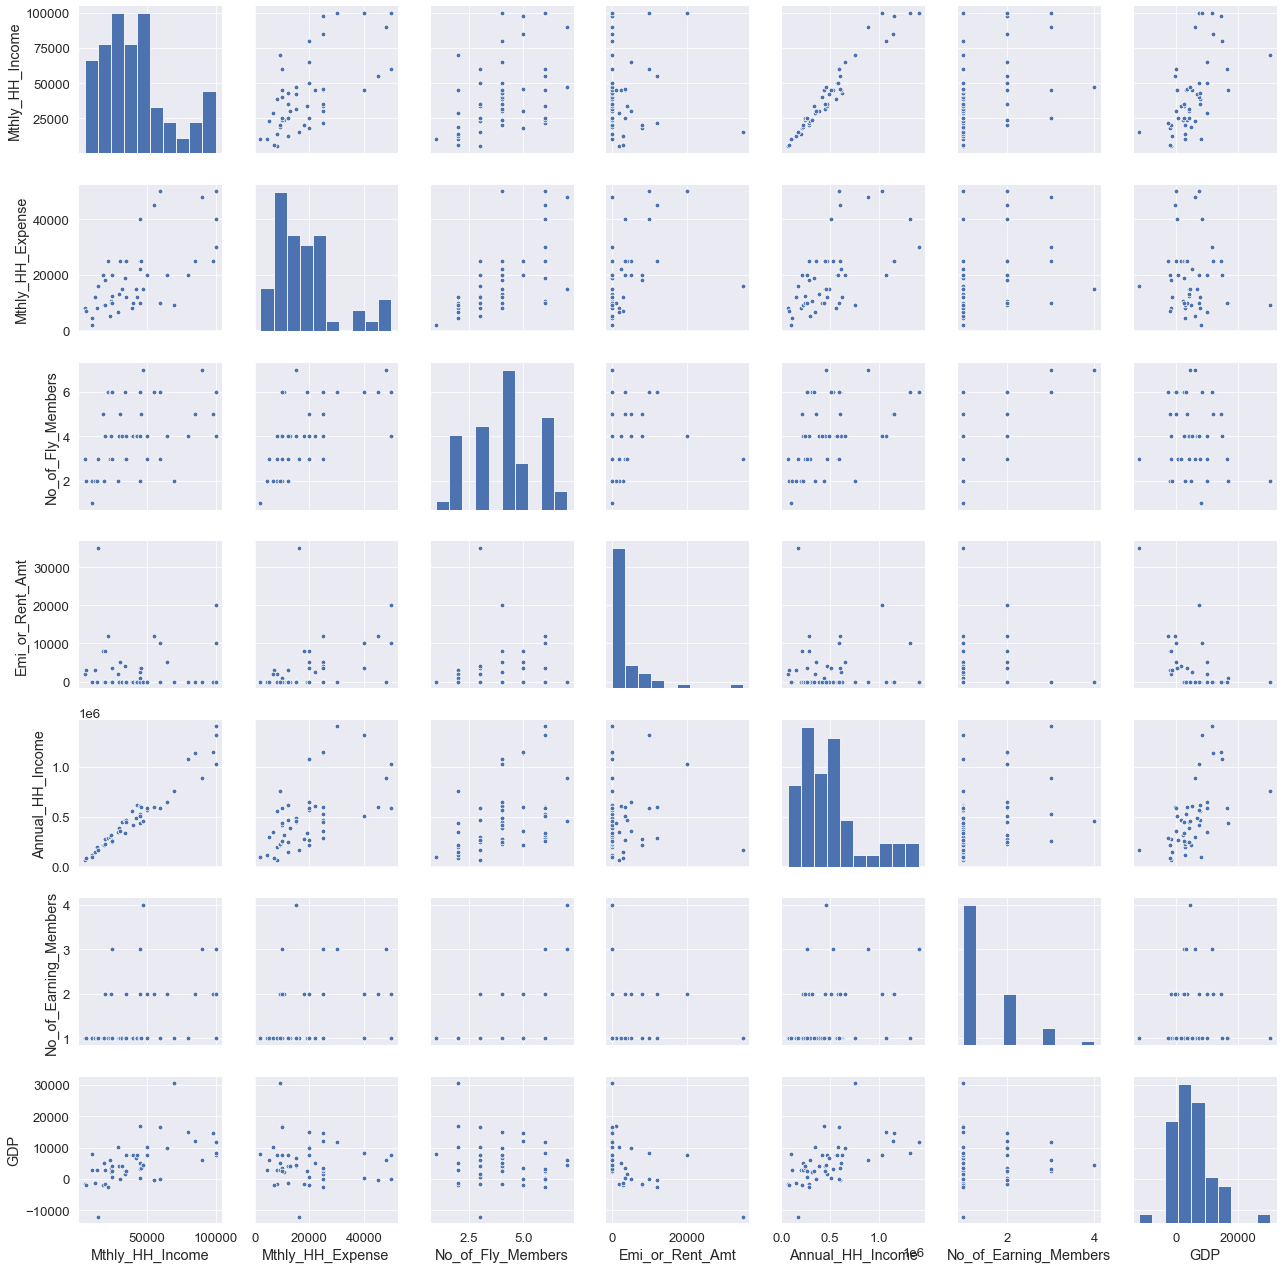

In [255]:
sns.pairplot(data = df)

Text(0, 0.5, 'Count')

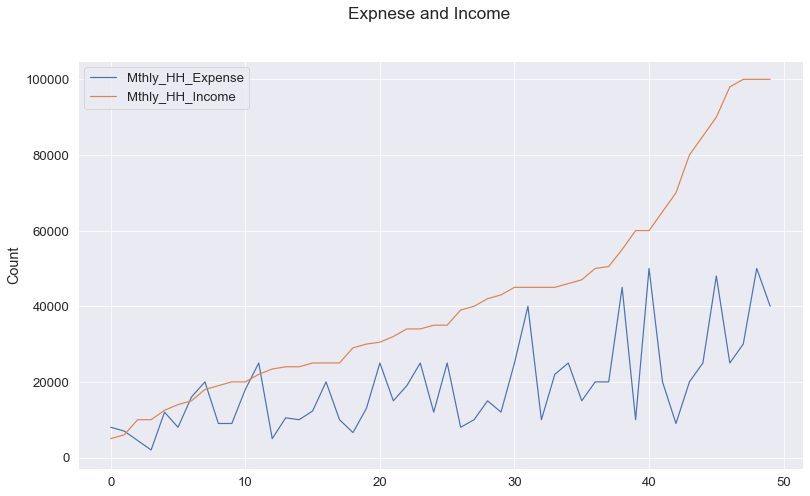

In [256]:
df[["Mthly_HH_Expense", "Mthly_HH_Income"]].plot()
plt.suptitle('Expnese and Income')
plt.ylabel('Count')

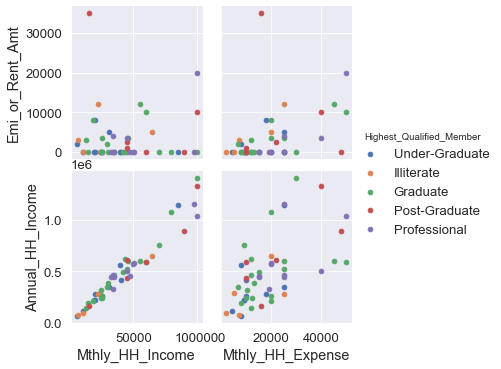

In [257]:
data_g = sns.PairGrid(df, hue='Highest_Qualified_Member',x_vars=['Mthly_HH_Income', 'Mthly_HH_Expense'],
                      y_vars=['Emi_or_Rent_Amt', 'Annual_HH_Income'])

data_g.map(plt.scatter)
data_g.add_legend()